# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np # for linear algebra
import pandas as pd # Data processing, CSV file importation

# Libraries for data preparation and model building
##Accuracy packages
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from tqdm import tqdm
import math
import random

#Visualization Packages
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import seaborn as sns 

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

To load your data, you need to make sure that the raw data and the notebook file are on the same folder on your computer, 
Then navigate to the Jupyter Notebook

In [2]:
# load the train data
df_train = pd.read_csv('Data/df_train.csv')
df_train

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000


In [3]:
# Load the test data
df_test = pd.read_csv('Data/df_test.csv')
df_test

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### Check the "Shape" of the data-sets
Looking at the shape of both datasets, it is clear that the data has been split into 2 sets. 75% of the data is designated as the train data while 25% of the data is designated as the test data. The shape also shows that the training set has 49 columns while the test data set has only 48 coulmns. The missing column from the test set is the column that our model is to predict. We can identify that particular entity by simply identifying the entity(Column) that is missing from the test data set. 
From examining both datasets, that column can be identified as the load_shortfall_3hr column.

In [4]:
df_train.shape, df_test.shape

((8763, 49), (2920, 48))

### THE COLUMN FUNCTION
The column function returns the names of all the columns that are in the dataframe.

In [5]:
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [6]:
df_test.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

### THE DESCRIBE FUNCTION
The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion 
and shape of a dataset's distribution, excluding null values.

In [7]:
# look at data statistics for df_train
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


### Data Statistics by cities
In the following cells, we shall narrown the data sets to the specific data set by city. This will allowus to assess the impact of city specific data values to the 3hr_load_shortfall.

In [8]:
# look at data statistics by Cities 
# Madrid
df = df_train
df_Madrid = df.filter(['time', 'Madrid_wind_speed','Madrid_humidity', 'Madrid_clouds_all',
'Madrid_rain_1h','Madrid_weather_id','Madrid_pressure', 'Madrid_temp_max',
'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h'])

In [9]:
# Bilbao
df = df_train
df_Bilbao = df.filter(['time', 'Bilbao_wind_speed','Bilbao_humidity', 'Bilbao_clouds_all',
'Bilbao_rain_1h','Bilbao_weather_id','Bilbao_pressure', 'Bilbao_temp_max',
'Bilbao_temp', 'Bilbao_temp_min', 'load_shortfall_3h'])

In [10]:
# Barcelona
df = df_train
df_Barcelona = df.filter(['time', 'Barcelona_wind_speed','Barcelona_humidity', 'Barcelona_clouds_all',
'Barcelona_rain_1h','Barcelona_weather_id','Barcelona_pressure', 'Barcelona_temp_max',
'Barcelona_temp', 'Barcelona_temp_min', 'load_shortfall_3h'])

In [11]:
# Seville
df = df_train
df_Seville = df.filter(['time', 'Seville_wind_speed','Seville_humidity', 'Seville_clouds_all',
'Seville_rain_1h','Seville_weather_id','Seville_pressure', 'Seville_temp_max',
'Seville_temp', 'Seville_temp_min', 'load_shortfall_3h'])

In [12]:
# Valencia
df = df_train
df_Valencia = df.filter(['time', 'Valencia_wind_speed','Valencia_humidity', 'Valencia_clouds_all',
'Valencia_rain_1h','Valencia_weather_id','Valencia_pressure', 'Valencia_temp_max',
'Valencia_temp', 'Valencia_temp_min', 'load_shortfall_3h'])

### FEATURE DISTRIBUTION BY CITY
In the following cells, we shall generate independent histograms to evaluate the features of each city in the data set. Hopefully, this process will reveal similarities or differences in the said features from within the sets.

array([[<AxesSubplot:title={'center':'Madrid_wind_speed'}>,
        <AxesSubplot:title={'center':'Madrid_humidity'}>,
        <AxesSubplot:title={'center':'Madrid_clouds_all'}>],
       [<AxesSubplot:title={'center':'Madrid_rain_1h'}>,
        <AxesSubplot:title={'center':'Madrid_weather_id'}>,
        <AxesSubplot:title={'center':'Madrid_pressure'}>],
       [<AxesSubplot:title={'center':'Madrid_temp_max'}>,
        <AxesSubplot:title={'center':'Madrid_temp'}>,
        <AxesSubplot:title={'center':'Madrid_temp_min'}>],
       [<AxesSubplot:title={'center':'load_shortfall_3h'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

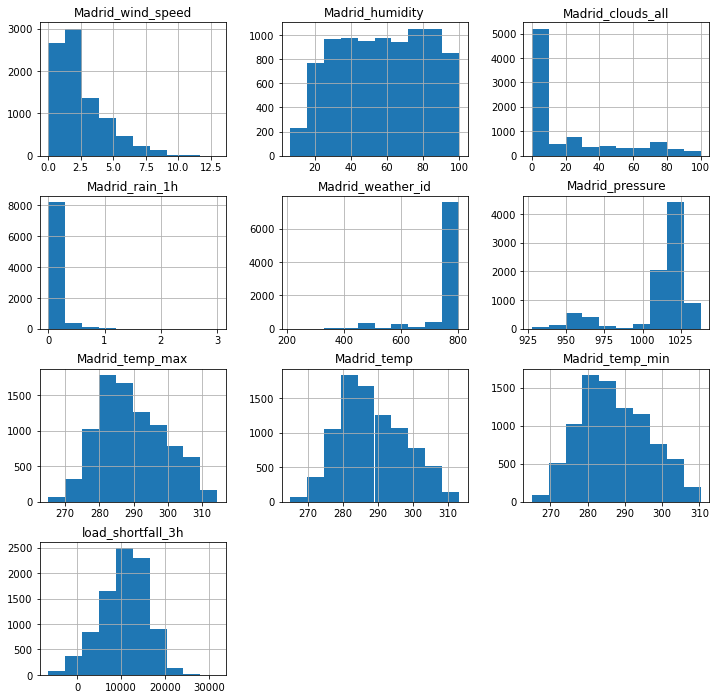

In [13]:
# Madrid
df_Madrid.hist(layout = (4,3), figsize=(12, 12))

array([[<AxesSubplot:title={'center':'Bilbao_wind_speed'}>,
        <AxesSubplot:title={'center':'Bilbao_clouds_all'}>,
        <AxesSubplot:title={'center':'Bilbao_rain_1h'}>],
       [<AxesSubplot:title={'center':'Bilbao_weather_id'}>,
        <AxesSubplot:title={'center':'Bilbao_pressure'}>,
        <AxesSubplot:title={'center':'Bilbao_temp_max'}>],
       [<AxesSubplot:title={'center':'Bilbao_temp'}>,
        <AxesSubplot:title={'center':'Bilbao_temp_min'}>,
        <AxesSubplot:title={'center':'load_shortfall_3h'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

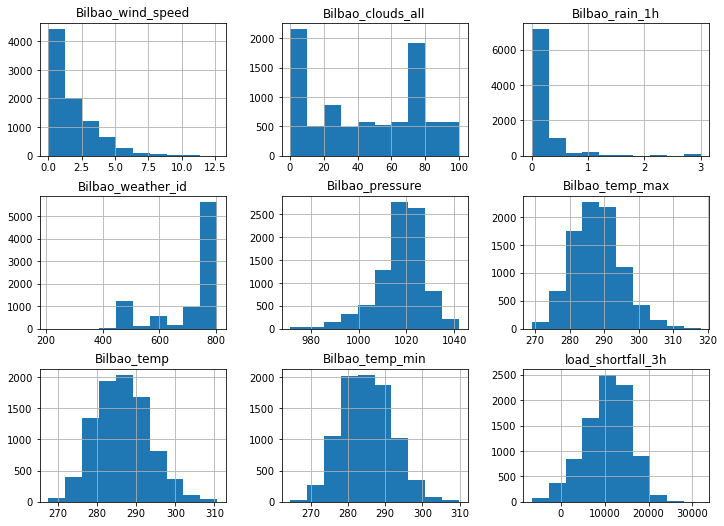

In [14]:
# Bilbao
df_Bilbao.hist(layout = (4,3), figsize=(12, 12))

array([[<AxesSubplot:title={'center':'Barcelona_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_1h'}>,
        <AxesSubplot:title={'center':'Barcelona_weather_id'}>],
       [<AxesSubplot:title={'center':'Barcelona_pressure'}>,
        <AxesSubplot:title={'center':'Barcelona_temp_max'}>,
        <AxesSubplot:title={'center':'Barcelona_temp'}>],
       [<AxesSubplot:title={'center':'Barcelona_temp_min'}>,
        <AxesSubplot:title={'center':'load_shortfall_3h'}>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

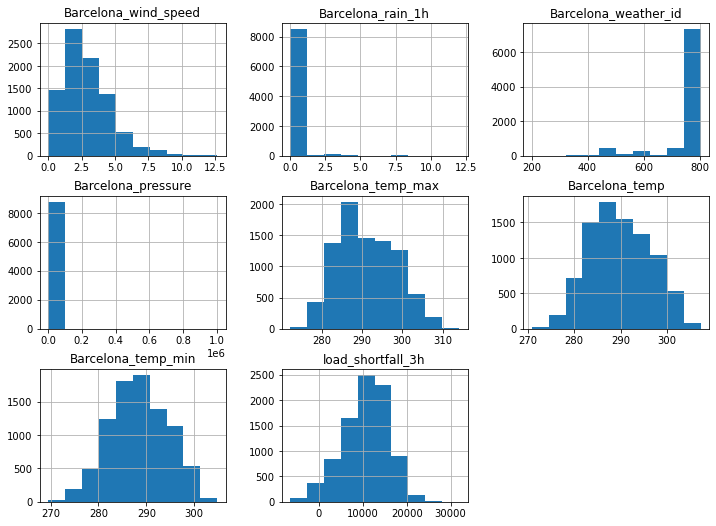

In [15]:
# Barcelona
df_Barcelona.hist(layout = (4,3), figsize=(12, 12))

array([[<AxesSubplot:title={'center':'Seville_wind_speed'}>,
        <AxesSubplot:title={'center':'Seville_humidity'}>,
        <AxesSubplot:title={'center':'Seville_clouds_all'}>],
       [<AxesSubplot:title={'center':'Seville_rain_1h'}>,
        <AxesSubplot:title={'center':'Seville_weather_id'}>,
        <AxesSubplot:title={'center':'Seville_temp_max'}>],
       [<AxesSubplot:title={'center':'Seville_temp'}>,
        <AxesSubplot:title={'center':'Seville_temp_min'}>,
        <AxesSubplot:title={'center':'load_shortfall_3h'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

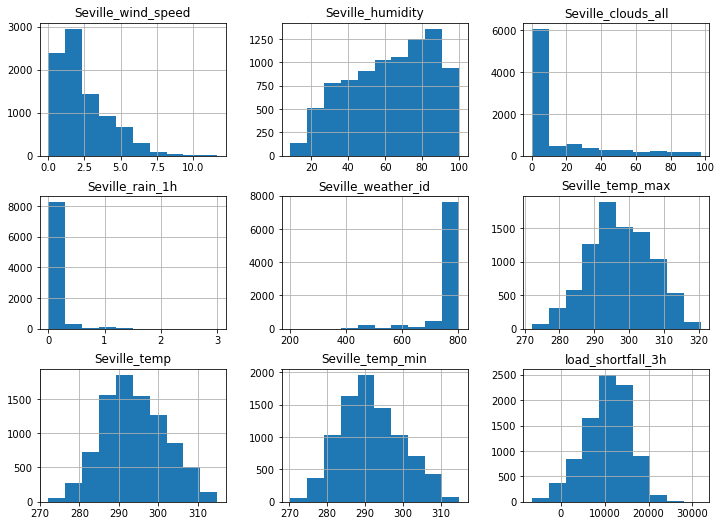

In [16]:
# Seville
df_Seville.hist(layout = (4,3), figsize=(12, 12))

array([[<AxesSubplot:title={'center':'Valencia_wind_speed'}>,
        <AxesSubplot:title={'center':'Valencia_humidity'}>,
        <AxesSubplot:title={'center':'Valencia_pressure'}>],
       [<AxesSubplot:title={'center':'Valencia_temp_max'}>,
        <AxesSubplot:title={'center':'Valencia_temp'}>,
        <AxesSubplot:title={'center':'Valencia_temp_min'}>],
       [<AxesSubplot:title={'center':'load_shortfall_3h'}>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

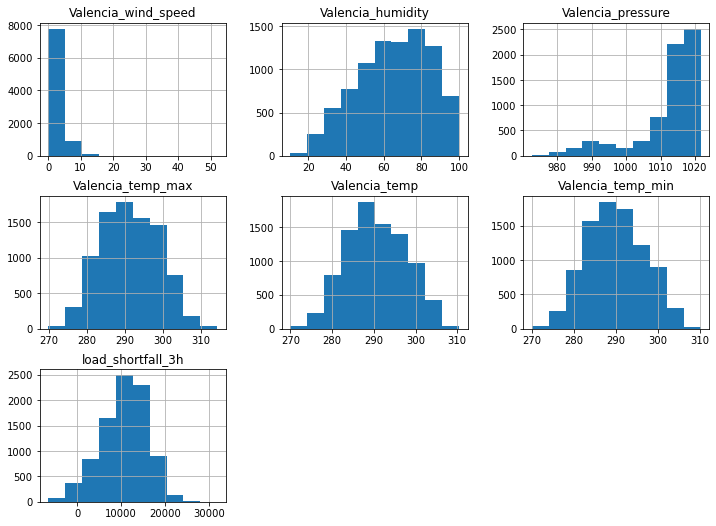

In [17]:
# Valencia
df_Valencia.hist(layout = (4,3), figsize=(12, 12))

In [18]:
# look at data statistics for df_test
df_test.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,10222.500000,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,...,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,843.075718,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,...,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,8763.000000,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,...,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,9492.750000,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,...,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,10222.500000,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,...,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,10952.250000,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,...,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,293.150000
max,11682.000000,13.333333,1.600000,14.333333,100.000000,100.000000,97.333333,10.666667,93.333333,360.000000,...,309.483333,313.483333,308.150000,307.483333,308.966667,306.816667,310.816667,314.483333,312.223333,310.150000


### Evaluating Correlation with the output Variable
It is neccesary to evaluate the correlation of the feature columns with each other. This is to eliminates columns that display strong corellation with each other. This eliminates the problems associated with multicollinearity. Values that are close to 1 or -1 shows strong corelation with each other and therefore would be eliminated to produce a better model. 

In [19]:
df.corrwith(df["load_shortfall_3h"]).sort_values(ascending=False)

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
Barcelona_temp_min      0.195984
Unnamed: 0              0.192612
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Valencia_pressure       0.086022
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Valencia_snow_3h       -0.021633
Barcelona_rain_3h      -0.024720
Madrid_rain_1h         -0.027159
Seville_rain_1h        -0.031572
Bilbao_snow_3h         -0.031721
Seville_ra

### Checking Correlation trends of variables citywise
In the following cells, we eveluate the correlatuion between features within cities. 


<AxesSubplot:>

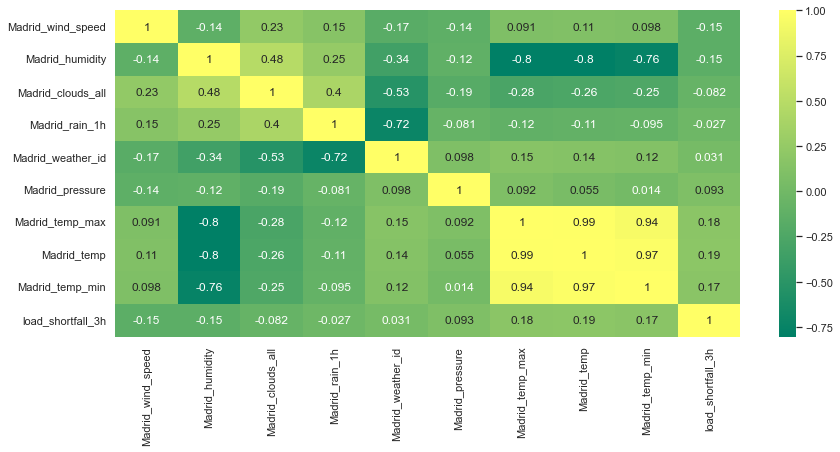

In [20]:
# Madrid
sns.set(rc = {'figure.figsize':(14,6)})
sns.heatmap(df_Madrid.corr(), annot = True, fmt='.2g',cmap= 'summer')

<AxesSubplot:>

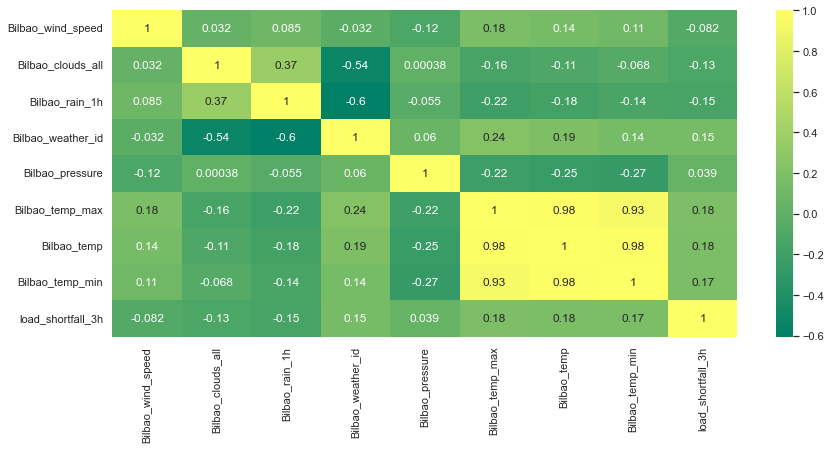

In [21]:
# Bilbao
sns.set(rc = {'figure.figsize':(14,6)})
sns.heatmap(df_Bilbao.corr(), annot = True, fmt='.2g',cmap= 'summer')

<AxesSubplot:>

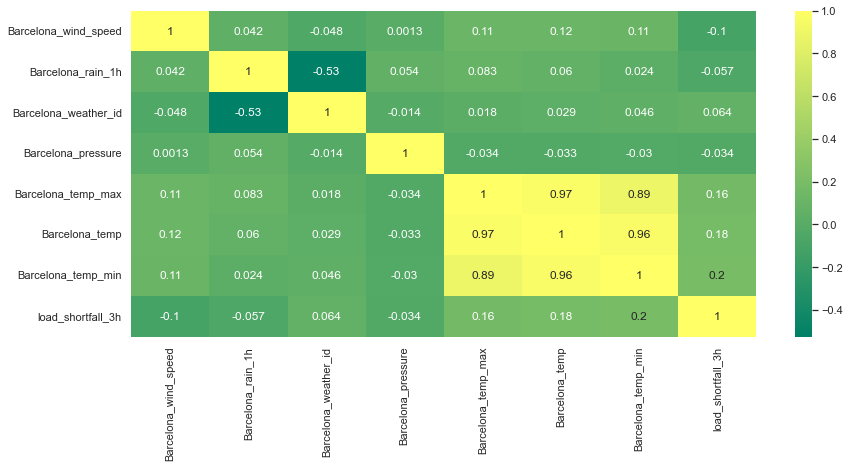

In [22]:
# Barcelona
sns.set(rc = {'figure.figsize':(14,6)})
sns.heatmap(df_Barcelona.corr(), annot = True, fmt='.2g',cmap= 'summer')

<AxesSubplot:>

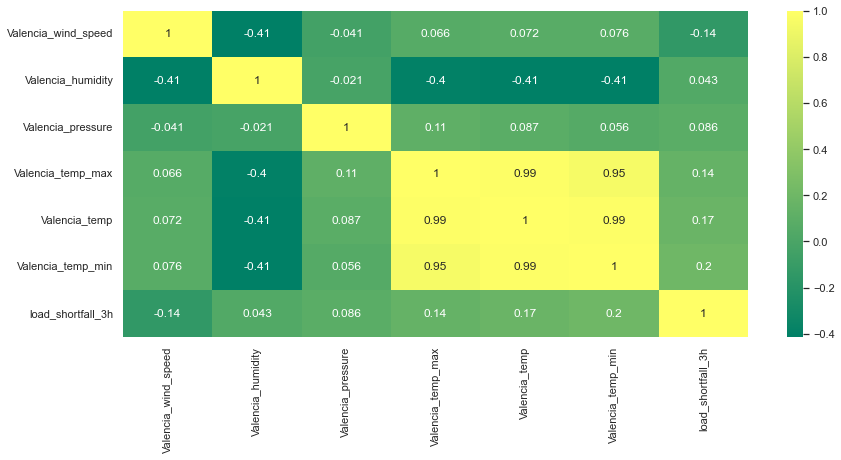

In [23]:
# Valencia
sns.set(rc = {'figure.figsize':(14,6)})
sns.heatmap(df_Valencia.corr(), annot = True, fmt='.2g',cmap= 'summer')

<AxesSubplot:>

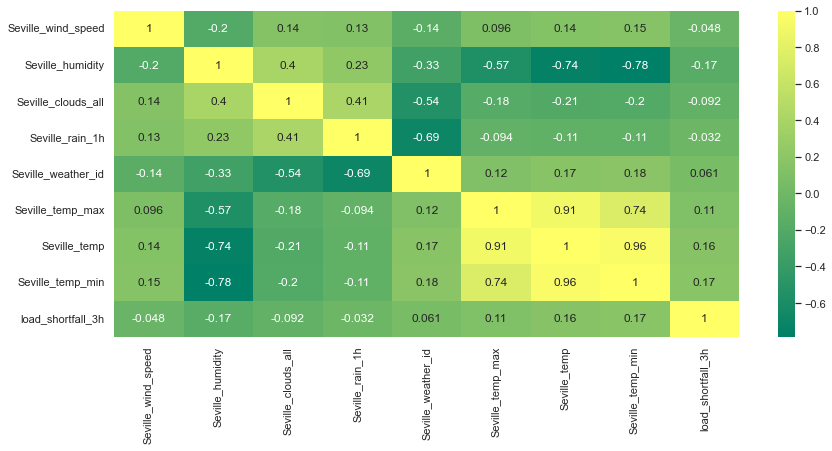

In [24]:
# Seville
sns.set(rc = {'figure.figsize':(14,6)})
sns.heatmap(df_Seville.corr(), annot = True, fmt='.2g',cmap= 'summer')

### THE 'ISNULL' FUNCTION
Identifying the column that has the null entries is important so it doesnt affect the performance of our model. 
this fuction shows us the number of null values present in the dataset. The function shows that only the Valencia_pressure has null values.

In [25]:
# Identify colunm(s) that contain null values in df_train
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [26]:
# Identify colunm(s) that contain null values in df_test
df_test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

In [27]:
# plot relevant feature interactions

In [28]:
# evaluate correlation

### Evaluate the correlation between the columns of the dataset
It is neccesary to evaluate the columns to see how the values within the columns correlate. if multiple columns show strong correlation, the correlating columns will have to be removed from the data set before it is used for model creation as these columns may not add any additional functionality or advantage to the model but will only serve to increase it's size and lead to slow performance. a correlation value of 1 represents a perfect positive correlation while a value equal to -1 indicates a perfect negative correlation. The further away the value is from 1 or -1, the weaker the correlation

In [29]:
# evaluate correlation for df_train
df_train.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


In [30]:
# evaluate correlation for df_test
df_test.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
Unnamed: 0,1.000000,-0.235888,-0.171216,-0.229930,-0.012468,-0.032478,-0.192422,-0.136715,-0.089696,-0.135484,...,0.248009,0.242473,0.248321,0.239508,0.262182,0.247846,0.289018,0.272777,0.241640,0.246385
Madrid_wind_speed,-0.235888,1.000000,0.253975,0.577509,-0.107176,-0.055267,0.164097,0.404369,0.166845,0.277087,...,-0.034217,-0.024364,-0.028548,-0.029330,-0.041190,-0.022688,-0.056954,-0.023627,-0.023591,-0.046734
Bilbao_rain_1h,-0.171216,0.253975,1.000000,0.155717,0.103573,0.149643,0.414151,0.118086,0.080647,0.183078,...,-0.207383,-0.223619,-0.202221,-0.221014,-0.239588,-0.196089,-0.258778,-0.233939,-0.218465,-0.217309
Valencia_wind_speed,-0.229930,0.577509,0.155717,1.000000,-0.214738,-0.100565,0.126358,0.423967,0.080878,0.281658,...,-0.003885,-0.004474,-0.001078,0.028977,0.015834,0.001775,-0.003910,0.030320,-0.006542,-0.033857
Seville_humidity,-0.012468,-0.107176,0.103573,-0.214738,1.000000,0.771534,0.033669,-0.172222,0.388829,-0.233416,...,-0.587597,-0.668035,-0.587903,-0.562529,-0.547807,-0.585128,-0.514154,-0.743369,-0.658135,-0.630085
Madrid_humidity,-0.032478,-0.055267,0.149643,-0.100565,0.771534,1.000000,0.005968,-0.043188,0.327895,-0.169288,...,-0.673470,-0.789474,-0.672803,-0.607507,-0.588370,-0.668369,-0.548738,-0.740434,-0.777081,-0.756214
Bilbao_clouds_all,-0.192422,0.164097,0.414151,0.126358,0.033669,0.005968,1.000000,0.001085,0.010232,0.227288,...,-0.075326,-0.102398,-0.071588,-0.128791,-0.167230,-0.067711,-0.215278,-0.132752,-0.104385,-0.108140
Bilbao_wind_speed,-0.136715,0.404369,0.118086,0.423967,-0.172222,-0.043188,0.001085,1.000000,0.138443,0.519614,...,-0.025420,-0.001129,-0.022682,0.078474,0.097111,-0.019624,0.117940,0.060728,-0.004439,-0.030676
Seville_clouds_all,-0.089696,0.166845,0.080647,0.080878,0.388829,0.327895,0.010232,0.138443,1.000000,0.007418,...,-0.166132,-0.208761,-0.158508,-0.126255,-0.123033,-0.150160,-0.114845,-0.170409,-0.206495,-0.213871
Bilbao_wind_deg,-0.135484,0.277087,0.183078,0.281658,-0.233416,-0.169288,0.227288,0.519614,0.007418,1.000000,...,0.112969,0.132334,0.114064,0.157191,0.146133,0.114486,0.124797,0.145157,0.130515,0.112450


In [31]:
# have a look at feature distributions

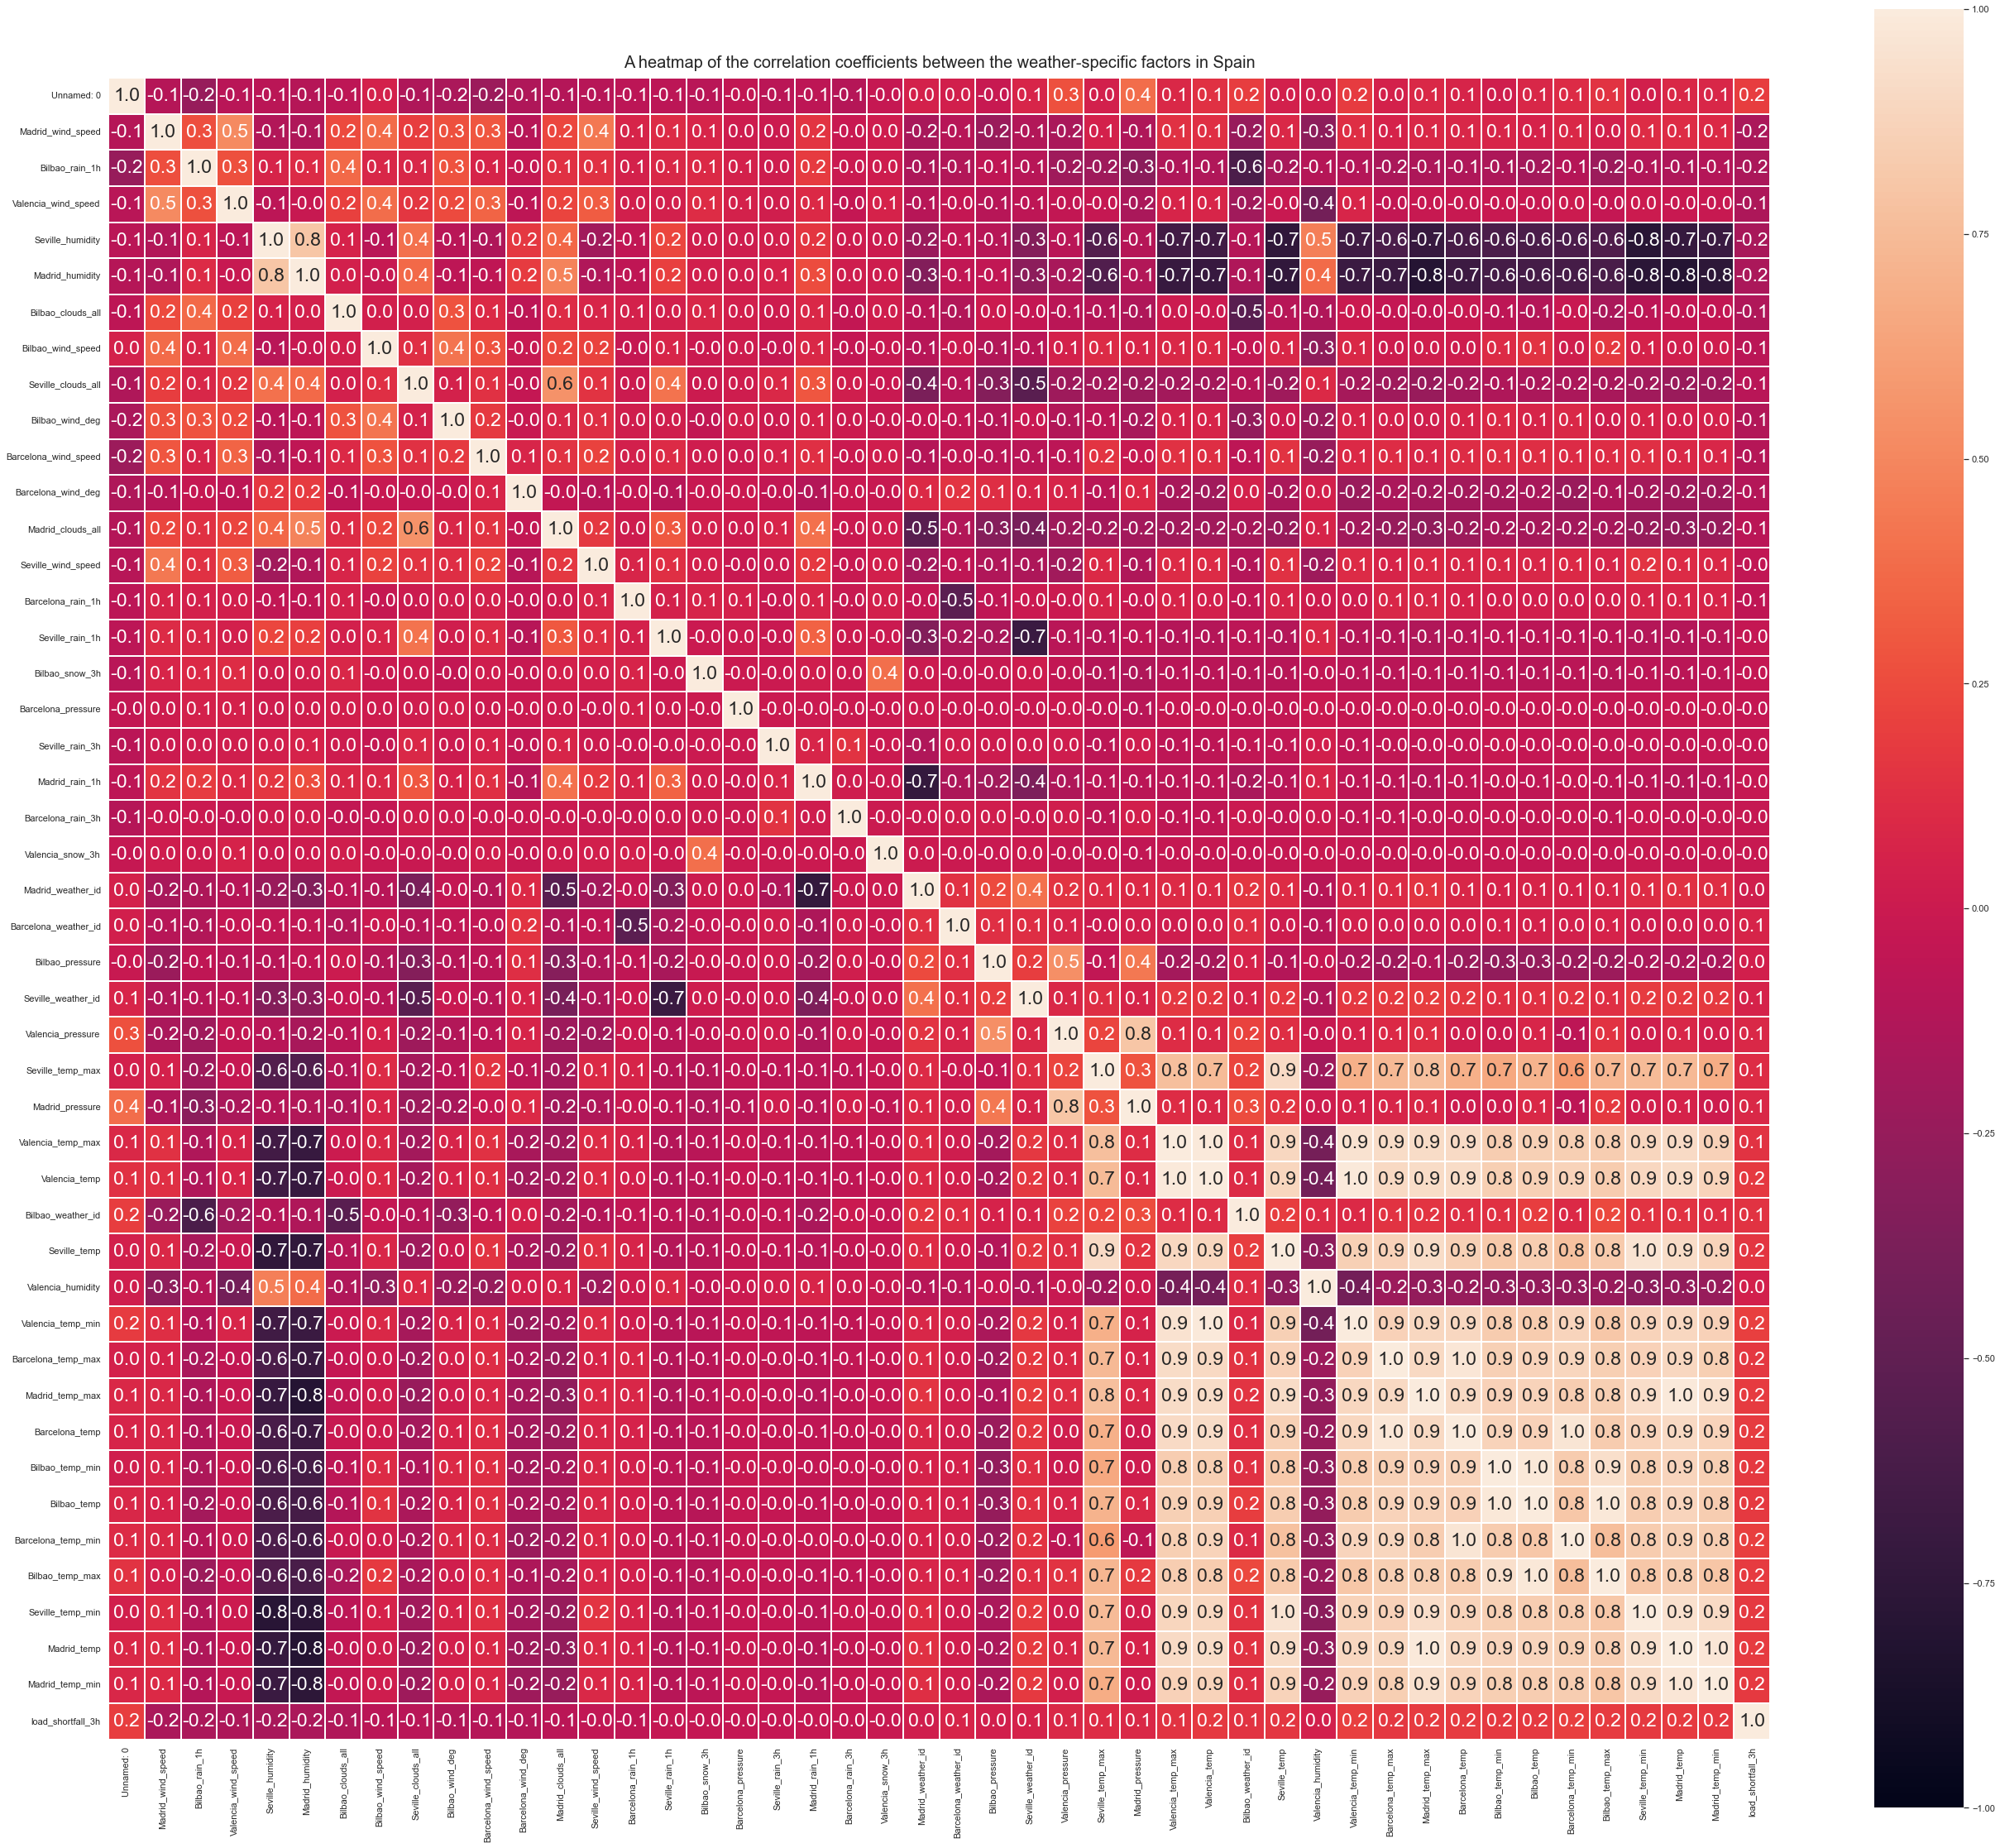

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc



plt.subplots(figsize=(45,40))



heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, annot_kws={'size': 23}, fmt='.1f', square=True, linecolor="w", linewidths=2)
sns.set(font_scale=3.0)



heatmap.set_title('A heatmap of the correlation coefficients between the weather-specific factors in Spain', fontdict={'fontsize': 20}, pad=12);

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

### MERGING THE DATA SET
Merging the dataset, the train and test data set helps to simplify your work, any action done affects both the the train and the test datasets.

In [33]:
# Merge the test and train data set to simplify your work 
merged_df = pd.concat([df_train, df_test])
merged_df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,...,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,5841.000000,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,...,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,3372.735932,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,...,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2920.500000,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,...,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,5841.000000,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,...,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,8761.500000,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,...,296.483333,295.150000,289.816667,291.040000,293.483333,292.483333,296.641333,294.993167,293.708917,14498.166667
max,11682.000000,13.333333,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,360.000000,...,314.483333,308.150000,309.816667,310.710000,306.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [34]:
merged_df.shape

(11683, 49)

### CHECKING FOR NULL VALUES IN THE MERGED DATASETS
When this is run our expected result is the sum of all the null values contained in both the train andtest dataset

In [35]:
merged_df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

### CHECKING THE TAIL OF THE MERGED DATASET
Checking the tail of the merged dataset helps us to confirm that the dsata represented at the tail is consistent with the data we get from the df_test data set.

In [36]:
merged_df.tail(5)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,...,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


### FIXING NULL VALUES
Looking at the merged_df dataset, everything seems to be in order except the "Valencia_pressure" data set which records 2,522 null entries. Note that the load_shortfall_3h has null entries because it is the value that is to be predicted by the model. After merging the train and  the test data-sets to simplify the work of pre-processing and data cleaning, any action carried out on the merged data set affects bothe the df_train and the df_test data sets as they are both one single dataframe now.So, you can carry out the actions neccesary for data cleaning only once on the merged data set.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Valencia_pressure'>

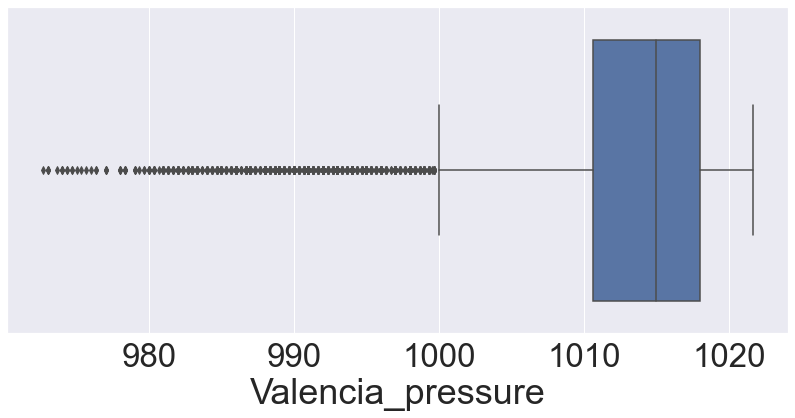

In [37]:
sns.boxplot(merged_df['Valencia_pressure'])

In [38]:
print('Mean')
print(merged_df['Valencia_pressure'].mean())
print('Mode')
print(merged_df['Valencia_pressure'].mode())
print('Median')
print(merged_df['Valencia_pressure'].median())

Mean
1012.3466870428985
Mode
0    1018.0
dtype: float64
Median
1015.0


### CHOOSING THE VALUE TO REPLACE THE NULL VALUES
To fix the null value problem, you can choose to either remove the entries with these nulls from your data set or fill in the  the null values by replacing the nulls with the mean, median or mode. It wouldn't really make too much of a difference which entry you choose to go with as these features are actually quite simmilar looking at the measures of centralization of the "Valencia_pressure" from the data set and the box-plot shown above. For the purpose of this model, we shalll go with the last option and fill out the Null values in "Valencia pressure" with the mode.

In [39]:
# remove missing values/ features

In [40]:
#Save the cleaned data
merged_df_clean = merged_df
merged_df_clean['Valencia_pressure'] = merged_df_clean['Valencia_pressure'].fillna(merged_df_clean['Valencia_pressure'].mode()[0])

### CHECK DATA TYPE
Now that we have taken care of the null values, we can check to identify the data types contained in the dataset. Machine learning models only work with numeric data, which means the data types for the models must be floats or integers in order to get the best predictions out of the models built from our data.The code bellow reveals the data types of the data contained in our data set. Note that the "time" data, the "Valencia_wind_deg" data as well as the "Seville_pressure" are all object data (also known as strings). These have to be converted to floats or integers for the model to be able to make use of them as inputs. Like the null values, you can handle this problem by simply dropping the colunms. This is not recommended as everytime you drop data, you are loosing pottentially valuable information that may be very useful for your model building efforts. A more beneficial approach will be to process this data by Transforming it to numeric form or encoding it to a form that the model can utilize. 3 non-numeric objects are observed from the merged_df_clean data set. they are "time", "Valencia_wind_deg" and "Seville_pressure"

In [41]:
merged_df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [42]:
merged_df_clean.dtypes


Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

### THE TIME COLUMN
Let us take a more thorough look at the object elements in our data frame. We will start with the time column. We need to take that column and map it into a date_time format which is the form that is usable by models

In [43]:
merged_df_clean['time']

0       2015-01-01 03:00:00
1       2015-01-01 06:00:00
2       2015-01-01 09:00:00
3       2015-01-01 12:00:00
4       2015-01-01 15:00:00
               ...         
2915    2018-12-31 09:00:00
2916    2018-12-31 12:00:00
2917    2018-12-31 15:00:00
2918    2018-12-31 18:00:00
2919    2018-12-31 21:00:00
Name: time, Length: 11683, dtype: object

In [44]:
merged_df_clean['time'] = pd.to_datetime(merged_df_clean['time'])
merged_df_clean.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
2915   2018-12-31 09:00:00
2916   2018-12-31 12:00:00
2917   2018-12-31 15:00:00
2918   2018-12-31 18:00:00
2919   2018-12-31 21:00:00
Name: time, Length: 11683, dtype: datetime64[ns]

In [45]:
column_list =[]
merged_df_clean['Day'] = merged_df_clean['time'].dt.day
# month
merged_df_clean['Month'] = merged_df_clean['time'].dt.month
# year
merged_df_clean['Year'] = merged_df_clean['time'].dt.year
# hour
merged_df_clean['hour'] = merged_df_clean['time'].dt.hour
# minute
merged_df_clean['minute'] = merged_df_clean['time'].dt.minute
# second
merged_df_clean['second'] = merged_df_clean['time'].dt.second







column_list = ['time','Day','Month','Year','hour','minute','second'] + list(merged_df_clean.columns[1:-6])



merged_df_clean = merged_df_clean[column_list]




# Engineering existing features

### Dropping unnecessary columns
We need to drop columns that are not useful to the model. For now that would be the "Unnamed:0" and the "time" columns. Note that you can opt to add the time column to your model but that would require encoding the time data until it is in a form that is usable by the model. We see by running the .head function that the unwanted columns have indeed been dropped from our df. Your data is now clean and ready for use in model building

In [46]:
merged_df_clean = merged_df
merged_df_clean = merged_df_clean.drop(['Unnamed: 0', 'time','Madrid_temp_min','Seville_temp_min', 'Bilbao_temp_max','Bilbao_temp_min','Valencia_temp_max','Valencia_temp_min','Barcelona_temp_max','Barcelona_temp_min'], axis = 1)

In [47]:
merged_df_clean.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp,Bilbao_temp,Madrid_temp,load_shortfall_3h,Day,Month,Year,hour,minute,second
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,281.013000,269.338615,265.938000,6715.666667,1,1,2015,3,0,0
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,280.561667,270.376000,266.386667,4171.666667,1,1,2015,6,0,0
2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,281.583667,275.027229,272.708667,4274.666667,1,1,2015,9,0,0
3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,283.434104,281.135063,281.895219,5075.666667,1,1,2015,12,0,0
4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,284.213167,282.252063,280.678437,6620.666667,1,1,2015,15,0,0


### The Valencia_wind_deg Column
The next object in the dataset is the "Valencia_wind_deg". This is recorded as levels which are denoted by the string "level" followed by a number which describes that particular level. To encode this, we can simply extract the number from the column that identifies that level. This line of code can help us to achieve that

In [48]:
merged_df_clean['Valencia_wind_deg']

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
2915     level_9
2916     level_8
2917     level_6
2918     level_6
2919    level_10
Name: Valencia_wind_deg, Length: 11683, dtype: object

In [49]:
merged_df_clean['Valencia_wind_deg'] = merged_df_clean['Valencia_wind_deg'].str.extract('(\d+)')
merged_df_clean['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: object

As you can see above, the data has been reduced to a number without the string "level" to define it but there is still a problem. The data type is still an object. we can convert the object to numeric form by using the pandas numeric function.

In [50]:
merged_df_clean['Valencia_wind_deg'] = pd.to_numeric(merged_df_clean['Valencia_wind_deg'])
merged_df_clean.Valencia_wind_deg

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

Repeat the process for Seville_pressure

In [51]:
merged_df_clean['Seville_pressure'] = merged_df_clean['Seville_pressure'].str.extract('(\d+)')

In [52]:
merged_df_clean['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: object

In [53]:
merged_df_clean['Seville_pressure'] = pd.to_numeric(merged_df_clean['Seville_pressure'])
merged_df_clean['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: int64

In [54]:
merged_df_clean.dtypes

Madrid_wind_speed       float64
Valencia_wind_deg         int64
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure          int64
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia_temp           float64
Bilbao_w

In [55]:
# create new features

In [56]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [57]:
merged_df_clean[len(df_train):]

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp,Bilbao_temp,Madrid_temp,load_shortfall_3h,Day,Month,Year,hour,minute,second
0,5.000000,8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,...,287.356667,280.380000,279.866667,NaN,1,1,2018,0,0,0
1,4.666667,8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,...,284.190000,281.010000,279.193333,NaN,1,1,2018,3,0,0
2,2.333333,7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,...,283.150000,279.196667,276.340000,NaN,1,1,2018,6,0,0
3,2.666667,7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,...,283.190000,281.740000,275.953333,NaN,1,1,2018,9,0,0
4,4.000000,7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,...,286.816667,284.116667,280.686667,NaN,1,1,2018,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.333333,9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.000000,70.000000,...,278.140000,273.210000,274.910000,NaN,31,12,2018,9,0,0
2916,0.333333,8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.000000,36.666667,...,286.150000,278.443333,283.156667,NaN,31,12,2018,12,0,0
2917,1.000000,6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.000000,14.666667,...,288.820000,285.073333,287.733333,NaN,31,12,2018,15,0,0
2918,1.000000,6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.000000,19.000000,...,284.473333,281.626667,283.813333,NaN,31,12,2018,18,0,0


In [58]:
# split data
y = merged_df_clean[:len(df_train)][['load_shortfall_3h']]
x = merged_df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)

In [59]:
x.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp,Madrid_temp,Day,Month,Year,hour,minute,second
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,265.938000,281.013000,269.338615,265.938000,1,1,2015,3,0,0
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,266.386667,280.561667,270.376000,266.386667,1,1,2015,6,0,0
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,272.708667,281.583667,275.027229,272.708667,1,1,2015,9,0,0
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.895219,283.434104,281.135063,281.895219,1,1,2015,12,0,0
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,280.678437,284.213167,282.252063,280.678437,1,1,2015,15,0,0


In [60]:
y.head()

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


### Create One or More ML Models


### Linear Regression
First we create a base model

In [61]:
# Declare the model object
lm = LinearRegression()

In [62]:
# create targets and features dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=50)

In [63]:
# fit linear model
lm.fit(x_train, y_train)
pred = lm.predict(x_test)

In [64]:
# evaluate one or more ML models
# Extract the intercept, or y-cut, of our linear model
m = float(lm.intercept_)

# Extract the coefficient, or gradient, of our linear model
n = lm.coef_

In [65]:
print("Slope:\t\t", n)
print("Intercept:\t", float(m))

Slope:		 [[-1.66511213e+02 -1.12821886e+02 -5.27831907e+02 -5.54614367e+01
  -3.37108815e+01 -3.69629494e+00 -6.26099916e+00 -7.31077179e+01
   4.20582156e+00 -1.92375686e+00 -1.11065302e+02 -2.80091052e+00
   6.72720088e+00 -3.14262490e+01 -3.28704630e+02  2.53140396e+01
   4.46120855e+02  1.26342761e+02 -6.89602852e-03 -1.92185491e+04
   8.73548067e+02 -1.12193246e+04 -3.62023801e+03 -5.29419934e-01
   1.15205879e+00  9.58491220e+00  1.66621129e-01  4.88392071e+01
   4.33168759e+01 -1.27334921e+01  6.73515763e+01  8.15636249e-01
  -2.01561037e+02  2.01218903e+01 -1.05875875e+02  1.26410784e+02
  -5.83155060e+00  1.28709113e+02  5.37662757e+01  1.77000721e+02
   5.16204081e+02  9.88045596e+01  0.00000000e+00  0.00000000e+00]]
Intercept:	 -1091875.0192374452


### Random Forest Regression
Random forests or random decision forests is an ensemble learning method for classification, regression. We opted to use the random forest regression model. In the following cells, the random forest regression model will be loaded, trained and used for predicting the load shortfall from the given data set.

In [66]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
Rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
# Rfr.fit(x, y)
Rfr.fit(x_train, y_train)

C:\Users\AKINBO~1\AppData\Local\Temp/ipykernel_29680/2338847096.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rfr.fit(x_train, y_train)


RandomForestRegressor(random_state=0)

In [67]:
preds_Rfr = Rfr.predict(x_test) # test the output by changing values

In [68]:
preds_Rfr

array([14076.93166667, 13404.31666667,  9637.84      , ...,
       10168.08      ,  9337.3       ,  4614.79      ])

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

### THE ROOT MEAN SQUARED ERROR (RMSE)
The root mean squared error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the actual values observed. It is a very useful tool in telling how well your model predicted the values in the test data set. Below is a function that calculates and returns the
average RMSE of the model.

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [70]:
# Compare model performance
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

In [71]:
print("Linear Regression Model\t")
print("Root Mean Square Error :\t", rmse)
print("R-Square Score:\t", r2)

Linear Regression Model	
Root Mean Square Error :	 4830.661507355673
R-Square Score:	 0.18118124799869295


In [72]:
rmsee = np.sqrt(mean_squared_error(y_test,preds_Rfr))
r_2 = r2_score(y_test,preds_Rfr)

In [73]:
print("Forest Regression Model\t")
print("Root Mean Square Error :\t", rmsee)
print("R-Square Score:\t", r_2)

Forest Regression Model	
Root Mean Square Error :	 3052.3628837392307
R-Square Score:	 0.6730759319955739


In [74]:
# dictionary of results
results_dict = {
'Test R-Square Score':
{
"Linear Regression Model": r2,
"Random Forest Regrassion Mode":r_2
},
'Test RMSE':
{
"Linear Regression Model":rmse,
"Random Forest Regrassion Mode": rmsee
}
}# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
results_df

,Test R-Square Score,Test RMSE
Linear Regression Model,0.181181,4830.661507
Random Forest Regrassion Mode,0.673076,3052.362884


### HOW TO IMPROVE YOUR MODEL AND OPTIMIZE PERFORMANCE
consider taking these steps to generate better models and enhance the performance of your generated models.

    Better Model: This is just a basic linear regression model. Use google to find other models and try them out to see how this can make your model performance ratings to improve.

    Better Features: As you know, we dropped the date_time feature which just might be a very helpful feature to improve our model performance. Try to get this particular matrix back into your model by perfecting the neccesary steps to encode the "time" data until it fits into a form usable by your model. It will also be helpful to drop highly correlated features from the model.

    Hyper Parameter tuning: All models come with default features that can be edited in relation to the data set to improve model performance. Be careful in modifying hyper parameters though as this may also have a negative impact on the performance of your model.

    Cross validation: Use cross validation to improve model performance(refer to the cross validation train)

(Please note that you can and should improve your notebook by including extensive relevant visualizations as a tool for your EDA. Also, this list of recommendations is by no means exhaustive. You at liberty to research and apply other strategies to improve the performance of your model and make your presentation better.)

### MAKING A KAGGLE SUBMISSION
After you are done creating your model, you can make a kaggle submission from your models results by following this steps.

In [75]:
# for Submission
x_train = merged_df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = merged_df_clean[len(df_train):].drop('load_shortfall_3h',axis=1)

In [76]:
# fit linear model
lm.fit(x_train, y)
preds = lm.predict(x_test)

In [77]:
pred_y = pd.DataFrame(preds, columns = ['load_shortfall_3h'])
pred_y.head()

,load_shortfall_3h
0,7808.940969
1,7613.361236
2,8379.049354
3,8706.012107
4,8222.425984


In [78]:
output = pd.DataFrame({'time':df_test['time']})
team_submission_Lr = output.join(pred_y)
team_submission_Lr.to_csv('team_submission_.csv', index = False)

In [79]:
team_submission_Lr

,time,load_shortfall_3h
0,2018-01-01 00:00:00,7808.940969
1,2018-01-01 03:00:00,7613.361236
2,2018-01-01 06:00:00,8379.049354
3,2018-01-01 09:00:00,8706.012107
4,2018-01-01 12:00:00,8222.425984
...,...,...
2915,2018-12-31 09:00:00,11761.628836
2916,2018-12-31 12:00:00,13920.926575
2917,2018-12-31 15:00:00,15407.708588
2918,2018-12-31 18:00:00,15380.466487


In [80]:
# for Random Regression Model Rfr.fit(x_train, y)
Rfr.fit(x_train, y)
preds_Rfr = Rfr.predict(x_test)

C:\Users\AKINBO~1\AppData\Local\Temp/ipykernel_29680/2266907999.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rfr.fit(x_train, y)


In [81]:
pred_ry= pd.DataFrame(preds_Rfr,columns= ['load_shortfall_3h'])
pred_ry.head()

,load_shortfall_3h
0,10082.580000
1,8143.860000
2,7891.493333
3,10637.566667
4,12318.153333


In [82]:
output_Rfr = pd.DataFrame({'time':df_test['time']})
team_submission_Rfr = output_Rfr.join(pred_ry)
team_submission_Rfr.to_csv('team_submission_Rfr.csv', index = False)

In [83]:
team_submission_Rfr

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10082.580000
1,2018-01-01 03:00:00,8143.860000
2,2018-01-01 06:00:00,7891.493333
3,2018-01-01 09:00:00,10637.566667
4,2018-01-01 12:00:00,12318.153333
...,...,...
2915,2018-12-31 09:00:00,14486.300000
2916,2018-12-31 12:00:00,12881.730000
2917,2018-12-31 15:00:00,12034.983333
2918,2018-12-31 18:00:00,14100.850000


In [84]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [85]:
# discuss chosen methods logic